In [1]:
import numpy as np
import torch
for_ipynb_run = "/gpfsdswork/projects/rech/btm/uei84ht/"

In [61]:
data_path = for_ipynb_run+'LEGAL-P_E/SIGIR_experiments/finetuned_models/scotus/Extracted_data/from_2048input_ft_model/2048_input_len_100_overlap/J6b/'
train_labels = np.load(data_path+'validation_indexes_.npy',allow_pickle=True)
count = 0
for i in range(len(train_labels)):
    if train_labels[i] > 5:
        count+=1
print(count)

654


In [58]:
train_labels

array([4, 1, 5, ..., 1, 7, 5], dtype=object)

In [47]:
count = 0
for i in range(len(train_labels)):
    if train_labels[i] > 10:
        count+=1
print(count)

654


In [59]:
data_path = for_ipynb_run+'LEGAL-P_E/SIGIR_experiments/finetuned_models/scotus/EleutherAI_gpt-j-6B/Strategy_0/Training_data/chunks_with_100_overlap_and_2048_input-length_zero_pad/'
train_labels = np.load(data_path+'validation_indexes_.npy',allow_pickle=True)
count = 0
for i in range(len(train_labels)):
    if train_labels[i] > 10:
        count+=1
print(count)

809


In [60]:
train_labels

array([5, 2, 6, ..., 2, 8, 6])

In [26]:
import os
data_path = for_ipynb_run+'LEGAL-P_E/SIGIR_experiments/finetuned_models/scotus/Extracted_data/from_2048input_ft_model/2048_input_len_100_overlap/J6b/'
split_name_ = 'train'
number_of_chunks = 15
indexes = np.load(data_path+f'{split_name_}_indexes_.npy',allow_pickle=True)
embeddings = np.load(data_path+f'{split_name_}_.npy',allow_pickle=True)
labels = np.load(data_path+f'{split_name_}_labels_.npy',allow_pickle=True)
split_path_name = data_path + f"{number_of_chunks}_chunk_or_more" + '/'
if os.path.isdir(split_path_name)==False:
        os.makedirs(split_path_name)

In [27]:
#Extracting embeddings of only large documents(>2 chunks) from extracted embeddings for all documents
indexes_ , embeddings_, labels_ = [],[],[]
for i, (index, embeds, label) in enumerate(zip(indexes, embeddings, labels)):
    if index >= number_of_chunks:
        indexes_.append(index)
        embeddings_.append(embeds)
        labels_.append(label)
indexes_ = np.asarray(indexes_, dtype=object)
embeddings_ = np.asarray(embeddings_, dtype=object)
labels_ = np.asarray(labels_, dtype=object)
print(len(embeddings_))

119


In [69]:
data_path = for_ipynb_run+'LEGAL-P_E/SIGIR_experiments/finetuned_models/ildc/Extracted_data/from_512input_ft_model/InLegalBERT/'
data = np.load(data_path+'test.npy',allow_pickle=True)
data[2].shape

(10, 4, 768)

In [67]:
data[1].shape[0]

2

In [ ]:
2596(>2), 2410 (<= 2)

In [33]:
len(train_labels[28])

512

In [51]:
logits = torch.tensor([[0.0237, 0.0298, 0.1455, 0.0221, 0.0903, 0.1348, 0.0747, 0.0791, 0.1167,
         0.0503, 0.0569, 0.0625, 0.1133],
        [0.1187, 0.0403, 0.0383, 0.0786, 0.0505, 0.1040, 0.1045, 0.0281, 0.1206,
         0.0547, 0.1562, 0.0309, 0.0747],
        [0.1523, 0.0410, 0.1162, 0.0598, 0.0947, 0.0442, 0.0649, 0.0157, 0.1006,
         0.0835, 0.1167, 0.0579, 0.0522],
        [0.0396, 0.0309, 0.1533, 0.0718, 0.0679, 0.0304, 0.1270, 0.1108, 0.0771,
         0.1455, 0.0195, 0.0718, 0.0535],
        [0.1211, 0.0410, 0.1045, 0.1943, 0.0718, 0.0220, 0.0679, 0.0835, 0.1016,
         0.0110, 0.1025, 0.0177, 0.0608],
        [0.0435, 0.0444, 0.0311, 0.0200, 0.0208, 0.0074, 0.0312, 0.0117, 0.3145,
         0.0520, 0.3145, 0.0845, 0.0228]])

In [52]:
logits = np.asarray(logits)

In [6]:
o=len(np.asarray(1, dtype=np.float32))
o

TypeError: len() of unsized object

In [20]:
l = np.unravel_index(np.argmax(logits, axis=1), logits.shape)
am = np.argmax(logits, axis=1)

In [44]:
e = zip(am,logits)
list(e)

[(2,
  array([0.0237, 0.0298, 0.1455, 0.0221, 0.0903, 0.1348, 0.0747, 0.0791,
         0.1167, 0.0503, 0.0569, 0.0625, 0.1133], dtype=float32)),
 (10,
  array([0.1187, 0.0403, 0.0383, 0.0786, 0.0505, 0.104 , 0.1045, 0.0281,
         0.1206, 0.0547, 0.1562, 0.0309, 0.0747], dtype=float32)),
 (0,
  array([0.1523, 0.041 , 0.1162, 0.0598, 0.0947, 0.0442, 0.0649, 0.0157,
         0.1006, 0.0835, 0.1167, 0.0579, 0.0522], dtype=float32)),
 (2,
  array([0.0396, 0.0309, 0.1533, 0.0718, 0.0679, 0.0304, 0.127 , 0.1108,
         0.0771, 0.1455, 0.0195, 0.0718, 0.0535], dtype=float32)),
 (3,
  array([0.1211, 0.041 , 0.1045, 0.1943, 0.0718, 0.022 , 0.0679, 0.0835,
         0.1016, 0.011 , 0.1025, 0.0177, 0.0608], dtype=float32)),
 (8,
  array([0.0435, 0.0444, 0.0311, 0.02  , 0.0208, 0.0074, 0.0312, 0.0117,
         0.3145, 0.052 , 0.3145, 0.0845, 0.0228], dtype=float32))]

In [41]:

for pred in logits:
    for am, t in zip()
    
for t, am_zip in zip(np.asarray(logits),zip(am,np.asarray(logits))):
    t = np.zeros_like(t)
    t[list(am_zip)[0]] = 1
    


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [53]:
def convert_to_binarised_pred(logits):
    binarised = np.zeros_like(logits)
    am = np.argmax(logits, axis=-1)
    print(am)
    for i, (am_, logit) in enumerate(zip(am, logits)):
        binarised[i][am_] = 1
    return binarised
logits = convert_to_binarised_pred(logits)
print(logits)

[ 2 10  0  2  3  8]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [40]:
logits

tensor([[0.0237, 0.0298, 0.1455, 0.0221, 0.0903, 0.1348, 0.0747, 0.0791, 0.1167,
         0.0503, 0.0569, 0.0625, 0.1133],
        [0.1187, 0.0403, 0.0383, 0.0786, 0.0505, 0.1040, 0.1045, 0.0281, 0.1206,
         0.0547, 0.1562, 0.0309, 0.0747],
        [0.1523, 0.0410, 0.1162, 0.0598, 0.0947, 0.0442, 0.0649, 0.0157, 0.1006,
         0.0835, 0.1167, 0.0579, 0.0522],
        [0.0396, 0.0309, 0.1533, 0.0718, 0.0679, 0.0304, 0.1270, 0.1108, 0.0771,
         0.1455, 0.0195, 0.0718, 0.0535],
        [0.1211, 0.0410, 0.1045, 0.1943, 0.0718, 0.0220, 0.0679, 0.0835, 0.1016,
         0.0110, 0.1025, 0.0177, 0.0608],
        [0.0435, 0.0444, 0.0311, 0.0200, 0.0208, 0.0074, 0.0312, 0.0117, 0.3145,
         0.0520, 0.3145, 0.0845, 0.0228]])

In [31]:
letters = ['a', 'b', 'c']
numbers = [0, 1, 2]
for l, n in zip(letters, numbers):
    print(f'Letter: {l}')
    print(f'Number: {n}')

Letter: a
Number: 0
Letter: b
Number: 1
Letter: c
Number: 2


In [15]:
train_labels.shape

(48595, 10)

In [ ]:
LEGAL-P_E/SIGIR_experiments/finetuned_models/ecthr_a/EleutherAI_gpt-j-6B/Strategy_0/sub_strategy_0/Training_data_EleutherAI_gpt-j-6B/chunks_with_100_overlap/train_labels_.npy

In [1]:
import datasets
import os
hggfc_model_name = 'EleutherAI/gpt-j-6B'
model_path = "/gpfsdswork/dataset/HuggingFace_Models/"+hggfc_model_name#"nlpaueb/legal-bert-base-uncased"#"QuentinKemperino/ECHR_test_2"#"QuentinKemperino/ECHR_test_Merged" #path to the model to finetune
dataset_subset = "scotus"

#Choose strategy
data_strategy = 0
strat = data_strategy
data_sub_strategy = 0
#"if oversample or not after combining 'multi' and 'single' dataset"
hggfc_model_name=hggfc_model_name.replace("/","_")
path_train_dat = f"/gpfsdswork/projects/rech/btm/uei84ht/LEGAL-P_E/SIGIR_experiments/finetuned_models/{dataset_subset}/{hggfc_model_name}/Strategy_{strat}/sub_strategy_{data_sub_strategy}/Training_data_{hggfc_model_name}/chunks_with_100_overlap/"
SAVE_DIR = f"/gpfsdswork/projects/rech/btm/uei84ht/LEGAL-P_E/SIGIR_experiments/finetuned_models/{dataset_subset}/{hggfc_model_name}/Strategy_{strat}/sub_strategy_{data_sub_strategy}/"

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#accelerator = Accelerator(project_dir=SAVE_DIR)       
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#if os.path.isdir(path_train_dat)==False:
#    os.makedirs(path_train_dat)
#if os.path.isdir(SAVE_DIR)==False:
#    os.makedirs(SAVE_DIR)

#load dataset 
if dataset_subset in ["eurlex","ecthr_a","ecthr_b"]:
    type_of_clasiification = "multi_label"#"multi_class"
    label_ = 'labels'
elif dataset_subset in ["scotus"]:
    type_of_clasiification = "multi_class"
    label_ = 'label'

#load dataset 
dataset = datasets.load_from_disk(f"/gpfsdswork/dataset/HuggingFace/lex_glue/{dataset_subset}")
#dataset = datasets.load_dataset("lex_glue", dataset_subset)

train_data = dataset['train'].to_pandas()

In [2]:
train_data['text'][]

,text,label
0,329 U.S. 29\n67 S.Ct. 1\n91 L.Ed. 22\nCHAMPLIN...,7
1,329 U.S. 1\n67 S.Ct. 6\n91 L.Ed. 3\nHALLIBURTO...,7
2,329 U.S. 14\n67 S.Ct. 13\n91 L.Ed. 12\nCLEVELA...,0
3,329 U.S. 40\n67 S.Ct. 167\n91 L.Ed. 29\nUNITED...,1
4,329 U.S. 90\n67 S.Ct. 133\n91 L.Ed. 103\nAMERI...,7
...,...,...
4995,459 U.S. 176\n103 S.Ct. 539\n74 L.Ed.2d 348\nS...,10
4996,459 U.S. 212\n103 S.Ct. 588\n74 L.Ed.2d 402\nC...,6
4997,459 U.S. 297\n103 S.Ct. 634\n74 L.Ed.2d 465\nD...,7
4998,459 U.S. 248\n103 S.Ct. 608\n74 L.Ed.2d 430\nT...,0


In [3]:
print(train_data)

                                                   text  label
0     329 U.S. 29\n67 S.Ct. 1\n91 L.Ed. 22\nCHAMPLIN...      7
1     329 U.S. 1\n67 S.Ct. 6\n91 L.Ed. 3\nHALLIBURTO...      7
2     329 U.S. 14\n67 S.Ct. 13\n91 L.Ed. 12\nCLEVELA...      0
3     329 U.S. 40\n67 S.Ct. 167\n91 L.Ed. 29\nUNITED...      1
4     329 U.S. 90\n67 S.Ct. 133\n91 L.Ed. 103\nAMERI...      7
...                                                 ...    ...
4995  459 U.S. 176\n103 S.Ct. 539\n74 L.Ed.2d 348\nS...     10
4996  459 U.S. 212\n103 S.Ct. 588\n74 L.Ed.2d 402\nC...      6
4997  459 U.S. 297\n103 S.Ct. 634\n74 L.Ed.2d 465\nD...      7
4998  459 U.S. 248\n103 S.Ct. 608\n74 L.Ed.2d 430\nT...      0
4999  459 U.S. 344\n103 S.Ct. 665\n74 L.Ed.2d 523\nL...      6

[5000 rows x 2 columns]


# code edit for Level 3 Classification + Clustering  

In [59]:
import argparse

def args_parser():
    args = argparse.ArgumentParser()
    args.add_argument(
        "--dataset_subset", 
        type=str, 
        default=None, 
        help="Dataset to train on")
    
    args.add_argument(
        "--combine_layers", 
        type=bool, 
        default=True, 
        help="Is the extracted data combined to train?")
    
    args.add_argument(
        "--add_layers",
        type=bool,
        default=False,
        help="Is the extracted data from last four layers added together?")
    
    args.add_argument(
        "--layers_from_end",
        type=int,
        default=4,
        help="How many layers from the end are combined or added?")
    
    args.add_argument(
        "--save_model_trained_here",
        type=bool,
        default=True,
        help="Save the model trained here?")
    
    args.add_argument(
        "--self_ft_extracted",
        type=bool,
        default=True,
        help="Is the extracted data extracted from model finetuned by you?")
    
    args.add_argument(
        "--ft_model_used_for_extraction",
        type=str,
        default="ft_model",
        help="If so then path of the finetuned model which was used for the extraction")
    
    args.add_argument(
        "--pretrained_model",
        type=str,
        default="Pretrained_model",
        help="which pretrained model was finetuned (path from huggingface)?")

    #------------------for training------------------
    args.add_argument(
        "--to_test",
        type=bool,
        default=False,
        help="If this is true only then it tests on the test set")
    
    args.add_argument(
        "--to_train",
        type=bool,
        default=True,
        help="If this is true only then it trains")
    
    args.add_argument(
        "--verbose",
        type=int,
        default=2,
        help="1 to show training, 2 for silent training, 3 for no display")
    
    args.add_argument(
        "--epochs",
        type=int,
        default=4,
        help="epochs to train the model")
    
    args.add_argument(
        "--batch_size",
        type=int,
        default=1,
        help="batch_size")
    
    args.add_argument(
        "--load_to_retrain",
        type=bool,
        default=False,
        help="load model for retraining")
    
    args.add_argument(
        "--model_load_path",
        type=str,
        default="",
        help="load model for retraining or testing (when to_test is true and to_train is false)")
    
    args.add_argument(
        "--to_freeze",
        type=bool,
        default=False,
        help="to freeze the encoder model")
    
    args.add_argument(
        "--layers_to_freeze",
        type=list,
        default=[1],
        help="Layers to freeze in the model")
    
    #------------only for encoder model
    args.add_argument(
        "--max_positional_encoding",
        type=int,
        default=40,
        help="max_positional_encoding")
    
    args.add_argument(
        "--num_layers",
        type=int,
        default=3,
        help="num_layers")
    
    args.add_argument(
        "--bilstm_before_encoder",
        type=bool,
        default=False,
        help="bilstm_before_encoder")
    
    args.add_argument(
        "--dropout_before_first_fnn",
        type=bool,
        default=True,
        help="dropout_before_first_fnn")
    
    args.add_argument(
        "--dropout_before_inner_fnn",
        type=bool,
        default=True,
        help="dropout_before_inner_fnn")
    
    args.add_argument(
        "--ffn_dropout_value",
        type=float,
        default=0.15,
        help="ffn_dropout_value")
    
    args.add_argument(
        "--dropout_after_first_encoder",
        type=bool,
        default=True,
        help="dropout_after_first_encoder")
    
    args.add_argument(
        "--dropout_after_second_encoder",
        type=bool,
        default=True,
        help="dropout_after_second_encoder")
    
    args.add_argument(
        "--encoder_dropout_value",
        type=float,
        default=0.25,
        help="encoder_dropout_value")
    
    args.add_argument(
        "--dff",
        type=int,
        default=2048,
        help="dff for transformer encoder block. Make this same as the hidden dimension of the transformer model (GPT-Neo, GPT-J etc.) used to extract the CLS embeddings")
    
    args.add_argument(
        "--d_model",
        type=int,
        default=768,
        help="""d_model for transformer encoder block. It is the embedding dimension for the input. 
        So for GPT-Neo and GPT-J it is 4096 i.e the the last feature dimension of the output layer of the model.""")
    
    args.add_argument(
        "--num_heads",
        type=int,
        default=8,
        help="num_heads for transformer encoder block")
    
    
    args.add_argument(
        "--include_rnn",
        type=bool,
        default=False,
        help="include RNNs for processing output after encoder models")
    
    args.add_argument(
        "--from_encoder",
        type=bool,
        default=False,
        help="connect directly to encoder or to inputs")
    
    
    #---------------------------------
    #-----------for clustering and dimensionality reduction techniques-------------------
    args.add_argument(
        "--with_clustering",
        type=bool,
        default=True,
        help="for all strategy of prediction with clustering")
    
    args.add_argument(
        "--clustering_strategy",
        type=str,
        default='hard',
        help="hard or soft clustering") 
    
    args.add_argument(
        "--dimReduction",
        type=str,
        default='pumap',
        help="pumap or kmeans") 
    
    args.add_argument(
        "--dim_reduction_metric",
        type=str,
        default='cosine',
        help="cosine or euclidean") 
    
    args.add_argument(
        "--pad_len",
        type=int,
        default=32,
        help="""The max length for the cluster labels for using with Dense layers processing. 
        Since input feature dimension for a dense layer is of fixed while model creation. 
        This decides the input feature dimension for the dense layer for clustered labels processing. 
        32 for ildc, 64 for scotus and eurlex, 128 for etchr_a, etchr_b""")
    
    args.add_argument(
        "--strategy",
        type=int,
        default=1,
        help="""
        strategy = 1.
                    Chunked CLS
                    embeddings  ------------------------> Encoder Model -> output
                        |                                   |
                Dimensionality Reduction --> Clustering ____|
                   (PrametricUMAP)
                
        strategy = 2.
                    Chunked CLS
                    embeddings           ---------------> Encoder Model -> output
                        |                |                  |
                Dimensionality Reduction --> Clustering ____|
                   (PrametricUMAP)
                   """
                   )
    
    args.add_argument(
        "--only_clustered",
        type=bool,
        default=False,
        help="only for strategy 3")
    
    args.add_argument(
        "--train_dimR",
        type=bool,
        default=False,
        help="to train dimensionality reduction model")
    
    args.add_argument(
        "--save_dimR",
        type=bool,
        default=False,
        help="to save dimensionality reduction model")
    
    args.add_argument(
        "--train_clusterer",
        type=bool,
        default=False,
        help="to train clustering model")
    
    args.add_argument(
        "--save_clusterer",
        type=bool,
        default=False,
        help="to save clustering model")

    args.add_argument(
        "--parent_dir",
        type=str,
        default="LEGAL-PE/Level-3_of_Framework/savedModels/",
        help="parent directory of the model (used to save the model)") 

    args = args.parse_args()

    if args.to_train == False:
        args.train_dimR = False 
        args.train_clusterer = False
    if args.train_dimR == True:
        args.save_dimR = True 
    if args.train_clusterer == True:
        args.save_clusterer = True
    if args.to_test and args.to_train==False:
        if args.model_load_path == "":
            raise ValueError("Please provide the model path to load for testing!")
    if args.combine_layers == False:
        args.layers_from_end = 1
        args.combine_layers = True

    return args


In [87]:
data_path = for_ipynb_run + "LEGAL-P_E/SIGIR_experiments/finetuned_models/scotus/Extracted_data/Neo2.7b/"

inputs_train = np.load(data_path+"train_.npy", allow_pickle = True)
labels_train = np.load(data_path+"train_labels_.npy", allow_pickle = True).astype('int32')

inputs_validate = np.load(data_path+"validation_.npy", allow_pickle = True)
labels_validate = np.load(data_path+"validation_labels_.npy", allow_pickle = True).astype('int32')

inputs_test = np.load(data_path+"test_.npy", allow_pickle = True)
labels_test = np.load(data_path+"test_labels_.npy", allow_pickle = True)

In [88]:
print(labels_train.shape)
print(labels_validate.shape)
print(labels_test.shape)
from collections import Counter
Counter(labels_train)

(5000,)
(1400,)
(1400,)


Counter({7: 1043,
         0: 1011,
         1: 811,
         6: 255,
         3: 193,
         8: 717,
         11: 220,
         2: 423,
         4: 45,
         10: 53,
         9: 191,
         5: 35,
         12: 3})

In [89]:
#for SCOTUS (cause of the error while extracting cls the labels were extracted in original int format rather than binarised array of 1's and 0's)
from sklearn.preprocessing import MultiLabelBinarizer,LabelBinarizer
lookup_ = LabelBinarizer()
lookup_.fit(labels_train)
labels_binarized_train = lookup_.transform(labels_train)
labels_binarized_validate = lookup_.transform(labels_validate)
labels_binarized_test = lookup_.transform(labels_test.astype('int32'))
print(labels_binarized_train.shape)
print(labels_binarized_validate.shape)
print(labels_binarized_test.shape)
from collections import Counter
#Counter(labels_binarized_train)

(5000, 13)
(1400, 13)
(1400, 13)


In [90]:
def if_correctly_binarised(actual_labels, binarised_labels):
    for a, b in zip(actual_labels, binarised_labels):
        if np.argmax(b) != a:
            print("not equal")
            return
    print("Equal")
    return

In [91]:
if_correctly_binarised(labels_train,labels_binarized_train)
if_correctly_binarised(labels_validate, labels_binarized_validate)
if_correctly_binarised(labels_test.astype('int32'), labels_binarized_test)

Equal
Equal
Equal


In [92]:
#save the binarised labels 
np.save(data_path+"train_labels_b.npy", labels_binarized_train)
np.save(data_path+"validation_labels_b.npy", labels_binarized_validate)
np.save(data_path+"test_labels_b.npy", labels_binarized_test)

In [54]:
labels_binarized_train[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [9]:
inputs_train[0].shape

(132, 4, 2560)

In [10]:
exp = np.load(data_path+"exp_.npy", allow_pickle = True)
y_exp = np.load(data_path+"exp_labels_.npy", allow_pickle = True) 

In [11]:
exp[0].shape

(18, 4, 2560)

In [ ]:
#LEGAL-P_E/SIGIR_experiments/finetuned_models/ildc/Extracted_data/from_512input_ft_model/Neo1.3b

In [2]:
#del inputs_train, labels_train, inputs_validate, labels_validate, test, y_test
data_path = for_ipynb_run + "LEGAL-P_E/SIGIR_experiments/finetuned_models/ildc/Extracted_data/from_2048input_ft_model/512_input_len_100_overlap/J6b/"
train_0 = np.load(data_path+"train_1_of_3_.npy", allow_pickle = True)
train_1 = np.load(data_path+"train_2_of_3_.npy", allow_pickle = True)
train_2 = np.load(data_path+"train_3_of_3_.npy", allow_pickle = True)
train_set = np.concatenate((train_0, train_1, train_2))
print(train_set[0].shape)

#np.save(data_path+"train_.npy",train_set)

(132, 4, 4096)


In [3]:
#data_path = for_ipynb_run + "LEGAL-P_E/SIGIR_experiments/finetuned_models/ildc/Extracted_data/J6b/"
train_ind_0 = np.load(data_path+"train_indexes_1_of_3_.npy", allow_pickle = True)
train_ind_1 = np.load(data_path+"train_indexes_2_of_3_.npy", allow_pickle = True)
train_ind_2 = np.load(data_path+"train_indexes_3_of_3_.npy", allow_pickle = True)
train_ind = np.concatenate((train_ind_0, train_ind_1, train_ind_2))
train_ind.shape

#np.save(data_path+"train_indexes_.npy",train_ind)

In [4]:
#data_path = for_ipynb_run + "LEGAL-P_E/SIGIR_experiments/finetuned_models/ildc/Extracted_data/J6b/"
train_lab_0 = np.load(data_path+"train_labels_1_of_3_.npy", allow_pickle = True)
train_lab_1 = np.load(data_path+"train_labels_2_of_3_.npy", allow_pickle = True)
train_lab_2 = np.load(data_path+"train_labels_3_of_3_.npy", allow_pickle = True)
train_lab = np.concatenate((train_lab_0, train_lab_1, train_lab_2))
train_lab.shape

#np.save(data_path+"train_labels_.npy",train_lab)

In [ ]:
#val_lab = np.load(data_path+"validation_.npy",allow_pickle=True)
print(train_set[0])

In [1]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(train_set))

NameError: name 'train_set' is not defined

In [63]:
len(train_lab)

37387

In [8]:
import pandas as pd
data = pd.read_csv(for_ipynb_run+"LEGAL-PE/SIGIR_experiments/datasets/ILDC/ILDC_multi.csv")
data_s = pd.read_csv(for_ipynb_run+"LEGAL-PE/SIGIR_experiments/datasets/ILDC/ILDC_single.csv")
train_data = data.query("split=='train'")
train_data_s = data_s.query("split=='train'")
validation_data = data.query("split=='dev'")
test_data = data.query("split=='test'")

In [15]:
print(train_data['label'][6])

1


In [60]:


args = args_parser()
if args.combine_layers:
    if args.layers_from_end==1:
        for i in range(inputs_validate.shape[0]):
            inputs_validate[i] = inputs_validate[i][0]
        if args.to_test:
            for i in range(test.shape[0]):
                test[i] = test[i][0]
        else:
            for i in range(inputs_train.shape[0]):
                inputs_train[i] = inputs_train[i][0]
    elif args.layers_from_end>1:
        l_ = args.layers_from_end
        for i in range(inputs_validate.shape[0]):
            inputs_validate[i] = inputs_validate[i][:,:l_,:]
        if args.to_test:
            for i in range(test.shape[0]):
                test[i] = test[i][:,:l_,:]
        else:
            for i in range(inputs_train.shape[0]):
                inputs_train[i] = inputs_train[i][:,:l_,:]
        
        if args.add_layers:
            for i in range(inputs_validate.shape[0]):
                inputs_validate[i] = np.sum(inputs_validate[i], axis = 1)
            if args.to_test:
                for i in range(test.shape[0]):
                    test[i] = np.sum(test[i], axis = 1)
            else:
                for i in range(inputs_train.shape[0]):
                    inputs_train[i] = np.sum(inputs_train[i], axis = 1)

        else:
            for i in range(inputs_validate.shape[0]):
                inputs_validate[i] = np.reshape(inputs_validate[i], (inputs_validate[i].shape[0], -1))  
            if args.to_test:
                for i in range(test.shape[0]):
                    test[i] = np.reshape(test[i], (test[i].shape[0], -1))
            else:
                for i in range(inputs_train.shape[0]):
                    inputs_train[i] = np.reshape(inputs_train[i], (inputs_train[i].shape[0], -1))

usage: ipykernel_launcher.py [-h] [--dataset_subset DATASET_SUBSET]
                             [--combine_layers COMBINE_LAYERS]
                             [--add_layers ADD_LAYERS]
                             [--layers_from_end LAYERS_FROM_END]
                             [--save_model_trained_here SAVE_MODEL_TRAINED_HERE]
                             [--self_ft_extracted SELF_FT_EXTRACTED]
                             [--ft_model_used_for_extraction FT_MODEL_USED_FOR_EXTRACTION]
                             [--pretrained_model PRETRAINED_MODEL]
                             [--to_test TO_TEST] [--to_train TO_TRAIN]
                             [--verbose VERBOSE] [--epochs EPOCHS]
                             [--batch_size BATCH_SIZE]
                             [--load_to_retrain LOAD_TO_RETRAIN]
                             [--model_load_path MODEL_LOAD_PATH]
                             [--to_freeze TO_FREEZE]
                             [--layers_to_freeze LAYERS_TO_FREEZE

SystemExit: 2

In [50]:
p = train_set[1][:,:3,:]
p.shape

(73, 3, 4096)

In [51]:
p_ = np.sum(p, axis = 1)
p_.shape

(73, 4096)

In [52]:
p__ = np.reshape(p, (p.shape[0],-1))
p__.shape

(73, 12288)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer,LabelBinarizer
def convert_to_binarised_labels(data, column: str, vocabulary: list = None, lookup = None, return_lookup: bool = False, problem_type: str = "multi_class"): #or multi_label
    #labels = tf.ragged.constant(train_data[column].values)
    #if lookup == None:
        #if vocabulary:
        #    lookup = tf.keras.layers.IntegerLookup(output_mode="multi_hot", vocabulary = vocabulary, vocabulary_dtype="int64")
        #else:
        #    lookup = tf.keras.layers.IntegerLookup(output_mode="multi_hot")
        #    lookup.adapt(labels)
    #    lookup = MultiLabelBinarizer()
    #    labels_binarized = lookup.fit_transform(train_data[column])
    #labels_binarized = lookup(labels).numpy().astype('int32')
    #else:
    if problem_type == "multi_class":
        data['labels'] = np.zeros((len(data),), dtype = object)
        if lookup == None:
            lookup_ = LabelBinarizer()
    else:
        if lookup == None:
            lookup_ = MultiLabelBinarizer()
    if lookup == None:
        lookup_.fit(data[column]) #data[column]
        labels_binarized = lookup_.transform(data[column])
    else:
        labels_binarized = lookup.transform(data[column])
    #print(labels_binarized)

    #print(lookup_.classes_)
    for i in tqdm(range(len(data))):
        data['labels'][i] = labels_binarized[i]
    if return_lookup: 
        return data, lookup_
    else:
        return data

### TO find the padding width for each dataset

In [8]:
import numpy as np
import statistics
for_ipynb_run = "/gpfsdswork/projects/rech/btm/uei84ht/"
#load training data
path_ = "LEGAL-P_E/SIGIR_experiments/finetuned_models/ecthr_a/Extracted_data/from_2048input_ft_model/2048_input_len_100_overlap/J6b/"
data_path = for_ipynb_run + path_
train_0 = np.load(data_path+"validation_.npy", allow_pickle = True)

In [2]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
def get_padding_widths(data, name:str, plot:bool = False, save_path:str = "/gpfsdswork/projects/rech/btm/uei84ht/"):
    max_width = 0
    all_widths = []
    for i in range(len(data)):
        width = data[i].shape[0]
        all_widths.append(width)
        if width > max_width:
            max_width = width
    median = statistics.median(all_widths)
    mean = statistics.mean(all_widths)
    width_dict = Counter(all_widths)
    df_width_dict = pd.DataFrame(width_dict, index=[0])
    if plot:
        # This is a list of unique values appearing in the input list
        all_width_unique = list(set(all_widths))
        # This is the corresponding count for each value
        counts = [all_widths.count(value) for value in all_width_unique]

        barcontainer = plt.bar(range(len(all_width_unique)),counts,width=0.4)

        # Some labels and formatting to look more like the example
        plt.bar_label(barcontainer,all_width_unique,label_type='edge')
        plt.axis('off')
        plt.show()
        
        plt.bar(all_width_unique,counts,width=0.4)
        plt.ylabel('Number of documents')
        plt.xlabel('Chunks')
        plt.xticks(range(len(all_width_unique)))
        plt.savefig(save_path+f'chunks_statistics_{name}.png')
        plt.show()
        #fig.set_xticklabels(x_labels)
        
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        langs = range(len(all_width_unique))
        students = [str(x) for x in counts]#counts
        ax.bar(langs,students)
        plt.show()
        
        
        df_width_dict.to_csv(save_path+f"chunks_statistics_{name}_Report.csv", index= True)
        
    print(f"median:{median}")
    return max_width+1, median, mean, all_width_unique,counts

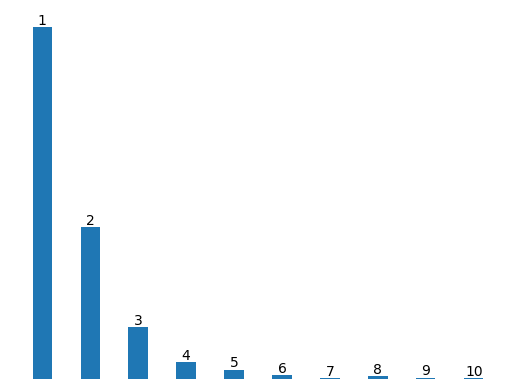

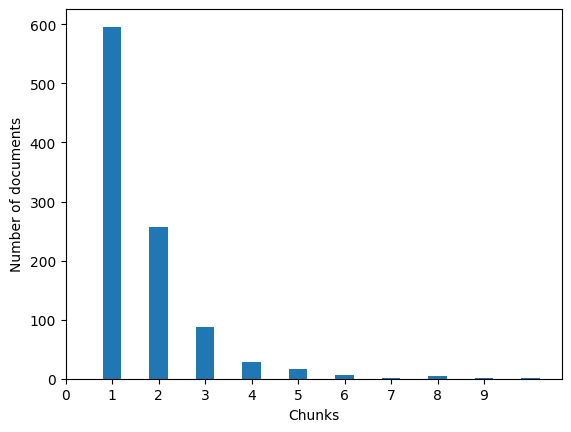

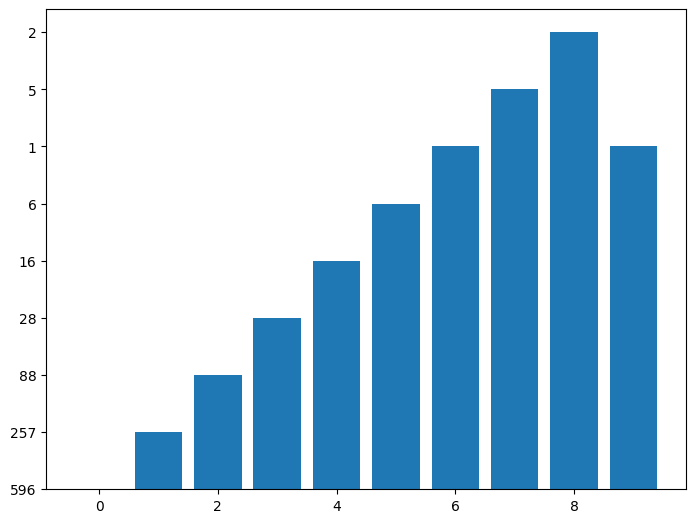

median:1.0
11
1.0
1.677


In [9]:
train_max_width, train_median_width, train_mean_width,all_width_unique,counts = get_padding_widths(train_0, name='train', plot=True,save_path=data_path)
print(train_max_width)
print(train_median_width)
print(train_mean_width)

In [7]:
train_w_u = all_width_unique
train_c = counts

In [11]:
val_w_u = all_width_unique
val_c = counts

In [4]:
test_w_u = all_width_unique
test_c = counts

In [19]:
def add_till_index_list(list_,index):
    l = []
    

[6096, 1757, 604, 250, 135, 56, 38, 19, 14, 8, 6, 6, 3, 3, 2, 1, 1, 1]

In [21]:
test_c

[560, 272, 87, 41, 22, 10, 6, 1, 1]

In [14]:
def pad_list(to_pad,value,length):
    new_a = to_pad + [value] * (length - len(to_pad))
    return new_a

In [15]:
val_c_ = pad_list(val_c,0,len(train_c))
val_c_[:5]

[596, 257, 88, 28, 16]

In [60]:
test_w_u

[1, 2, 3, 4, 5, 6, 7, 9, 11]

In [17]:
train_w_u_ = ['1', '2', '3', '4', '5-24']
train_c_ = [6096, 1757, 604, 250, 293]
val_c_ = [596, 257, 88, 28, 31]
test_c_ = [560, 272, 87, 41, 40]

In [19]:
df = pd.DataFrame({'Train': train_c_,
    'Validate': val_c_,#pad_list(val_c,0,len(train_c[:9])),
    'Test': test_c_#pad_list(test_c,0,len(train_c[:9]))
                   ,}, index=train_w_u_)

df.plot.barh(figsize=(6,3.5), xlabel = 'Number of documents (ECtHR (A), ECtHR(B))', ylabel='Number of chunks (chunk length=2048)', width = 0.7, rot=0)
#plt = ax.get_figure()
plt.savefig(data_path+'chunk_stats_all.pdf', dpi=600, bbox_inches='tight')


<Axes: xlabel='Number of documents (ECtHR (A), ECtHR(B))', ylabel='Number of chunks         (chunk length=2048)'>

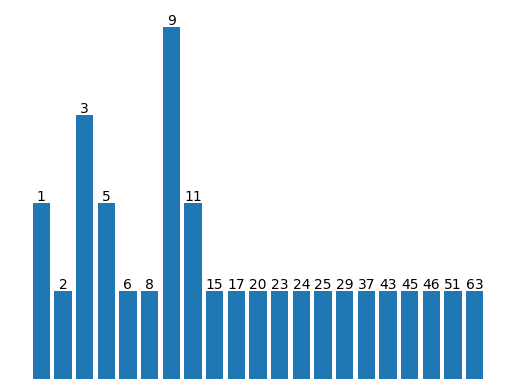

In [71]:
import matplotlib.pyplot as plt

lii = [46, 11, 9, 20, 3, 15, 8, 63, 11, 9, 24, 3, 5, 45, 51, 2, 23, 9, 17, 1, 1, 37, 29, 6, 3, 9, 25, 5, 43]

# This is a list of unique values appearing in the input list
lii_unique = list(set(lii))

# This is the corresponding count for each value
counts = [lii.count(value) for value in lii_unique]

barcontainer = plt.bar(range(len(lii_unique)),counts)

# Some labels and formatting to look more like the example
plt.bar_label(barcontainer,lii_unique, label_type='edge')
plt.axis('off')
plt.show()

In [14]:
import torch
sequence_lengths = torch.ne(torch.tensor([100,1,2,3,4,5,6,100,0,0,0,0,0,0]), torch.tensor([100])).sum(-1) - 1
sequence_lengths

tensor(11)

In [ ]:
#Refer: https://stackoverflow.com/questions/19184484/how-to-add-group-labels-for-bar-charts/39502106#39502106

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import groupby

def test_table():
    _one = [61.18, 58.06, 60.56, 59.35, 67.91, 68.9, 68.35, 67.42, 69.26, 59.16, 68.95, 58.17]
    _four = [69.94, 62.26, 64.79, 63.37, 76.80, 75.73, 75.74, 76.74, 68.66, 58.65, 68.49, 60.54]
    _struct = [68.70,63.78,68.83, 66.08, 77.27, 77.25, 77.48, 76.70, 70.25, 61.94, 68.72, 62.08]
    data_table = pd.DataFrame({'dataset':['ECtHR (A)']*4 + ['ECtHR (B)']*4 + ['SCOTUS']*4,
                           'encoders':(['1 x Encoder']*2 + ['2 x Encoder']*2)*3,
                           'split':['Val','Test','Val','Test','Val','Test','Val','Test','Val','Test','Val','Test'],
                           "l = 1, no generated structure labels": _one,
                           "l = 4, no generated structure labels": _four,
                           "l = 4, with generated structure labels": _struct
                           })
    
    """
    data_table = pd.DataFrame({'Room':['Room A']*4 + ['Room B']*4,
                               'Shelf':(['Shelf 1']*2 + ['Shelf 2']*2)*2,
                               'Staple':['Milk','Water','Sugar','Honey','Wheat','Corn','Chicken','Cow'],
                               'Quantity':[10,20,5,6,4,7,2,1],
                               'Ordered':np.random.randint(0,10,8)
                               })
    """
    return data_table

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]
    
def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

df = test_table().groupby(['dataset','encoders','split']).sum()
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot(kind='bar',ax=fig.gca(), figsize=(10,6), ylim=(50,100), ylabel = '$m-F1$', width = 0.5, grid = True)
#Below 3 lines remove default labels
labels = ['' for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.set_xlabel('')
label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)
plt.savefig(for_ipynb_run+'LEGAL-P_E/SIGIR_experiments/impact_genertaedStructLabels_on_macro_f1_of_lexglue.png', dpi=600)
plt.show()

## Getting dataset stats for long documents from extracted embeds and embeds for finetuning.

In [8]:
import numpy as np
import pandas as pd
import math
"""
def get_only_large_documents_ft_data(number_of_chunks, indexes, input_ids, attention_masks, labels):
    indexes_ , input_ids_, attention_masks_, labels_ = [],[],[],[]
    for i, (index, input_id, att_mask, label) in enumerate(zip(indexes, input_ids, attention_masks, labels)):
        if index >= number_of_chunks:
            indexes_.append(index)
            input_ids_.append(input_id) 
            attention_masks_.append(att_mask)
            labels_.append(label)
    #indexes_ = np.asarray(indexes_)#, dtype=object)
    #input_ids_ = np.asarray(input_ids_)#, dtype=object)
    #attention_masks_ = np.asarray(attention_masks_)#, dtype=object)
    #labels_ = np.asarray(labels_)#, dtype=object)
    return indexes_ , input_ids_, attention_masks_, labels_
"""
def get_only_large_documents_ft_data(
    number_of_chunks,
    indexes,
    input_ids,
    attention_masks,
    labels,
    chunk_number:int=None
    ):
    """
    chunk_number = {1, ... the last chunk}.
    So for slicing chunk_number-1 will be used.
    """
    if chunk_number == None:
        # Take the last chunk
        chunk_number = number_of_chunks-1
    indexes_ , input_ids_, attention_masks_, labels_ = [],[],[],[]
    for i, (index, input_id, att_mask, label) in enumerate(zip(indexes, input_ids, attention_masks, labels)):
        if index >= number_of_chunks:
            indexes_.append(index)
            input_ids_.append(input_id[chunk_number-1]) 
            attention_masks_.append(att_mask[chunk_number-1])
            labels_.append(label)
    #indexes_ = np.asarray(indexes_)#, dtype=object)
    #input_ids_ = np.asarray(input_ids_)#, dtype=object)
    #attention_masks_ = np.asarray(attention_masks_)#, dtype=object)
    #labels_ = np.asarray(labels_)#, dtype=object)
    return indexes_ , input_ids_, attention_masks_, labels_

def get_only_large_documents_extracted_embeds(
    number_of_chunks:int=None,
    indexes:int=None,
    embeddings=None,
    labels=None,
    eq_no_of_chunks_from_ft:int=None,
    eq_chunk_len:int=None,
    overlaps:int=100,
    current_chunk_len:int=512
):
    if eq_no_of_chunks_from_ft is not None and eq_chunk_len is not None:
        number_of_chunks = math.ceil((eq_no_of_chunks_from_ft*(eq_chunk_len-overlaps))/(current_chunk_len-overlaps)-4)
    elif number_of_chunks is None:
        print("Returning all documents. As no 'number of chunks' is given.")
        return indexes , embeddings, labels
    
    indexes_ , embeddings_, labels_ = [],[],[]
    for i, (index, embeds, label) in enumerate(zip(indexes, embeddings, labels)):
        if index>=number_of_chunks-1:
            indexes_.append(index)
            embeddings_.append(embeds)
            labels_.append(label)
    indexes_ = np.asarray(indexes_, dtype=object)
    embeddings_ = np.asarray(embeddings_, dtype=object)
    labels_ = np.asarray(labels_, dtype=object).astype('int32')
    return indexes_ , embeddings_, labels_

for_ipynb_run = "/gpfsdswork/projects/rech/btm/uei84ht/"
data_path_embeds = for_ipynb_run+"LEGAL-P_E/SIGIR_experiments/finetuned_models/scotus/Extracted_data/from_2048input_ft_model/2048_input_len_100_overlap/J6b/"
data_path_ft = for_ipynb_run+"LEGAL-P_E/SIGIR_experiments/finetuned_models/scotus/EleutherAI_gpt-j-6B/Strategy_0/Training_data/chunks_with_100_overlap_and_2048_input-length_zero_pad/"
number_of_chunks = 10
chunk_number = 1
testing_data_="cumulative"
data_split="test"
eq_no_of_chunks_from_ft=None#number_of_chunks
eq_chunk_len=2048

indexes_embed = np.load(data_path_embeds+data_split+"_indexes_.npy", allow_pickle = True)
inputs_embed = np.load(data_path_embeds+data_split+"_.npy", allow_pickle = True)
labels_embed = np.load(data_path_embeds+data_split+"_labels_.npy", allow_pickle = True).astype('int32')

indexes_ft = np.load(data_path_ft+data_split+"_indexes_"+testing_data_+".npy", allow_pickle = True)
inputs_ft = np.load(data_path_ft+data_split+'_input_ids_'+testing_data_+'.npy',allow_pickle=True)
masks_ft = np.load(data_path_ft+data_split+'_attention_masks_'+testing_data_+'.npy',allow_pickle=True)
labels_ft = np.load(data_path_ft+data_split+'_labels_'+testing_data_+'.npy',allow_pickle=True)

index_ft, input_ids_ft, att_mask_ft, labels_ft = get_only_large_documents_ft_data(
    number_of_chunks,
    indexes_ft,
    inputs_ft,
    masks_ft,
    labels_ft,
    chunk_number
)

index_embed, embeds, labels_embed = get_only_large_documents_extracted_embeds(
    number_of_chunks=number_of_chunks,
    indexes=indexes_embed,
    embeddings=inputs_embed,
    labels=labels_embed,
    eq_no_of_chunks_from_ft=eq_no_of_chunks_from_ft,
    eq_chunk_len=eq_chunk_len
)

print(len(labels_ft))
print(len(labels_embed))

307
307


## Plotting chunk-number vs prediction score for fine-tuned model (GPT-J 6B) in SCOTUS

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import *
sns.set()

In [3]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

NameError: name 'pokemon' is not defined

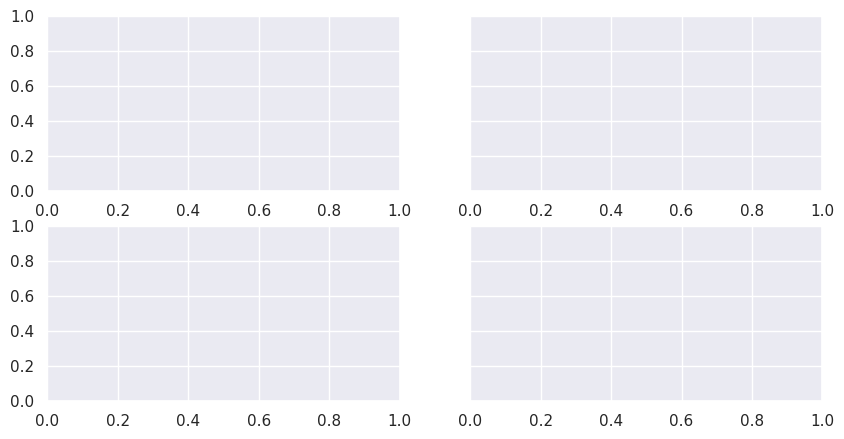

In [32]:
"""
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(10,5))
#fig.suptitle('Bigger 1 row x 2 columns axes with no data')
#axes[0,0].set_title('Minimum 4 chunks')
sns.boxplot(ax=axes[0, 0], data=pokemon, x='4 chunks or more', y='F1-score')
sns.boxplot(ax=axes[0, 1], data=pokemon, x='6 chunks or more', y='F1-score')
sns.boxplot(ax=axes[1, 0], data=pokemon, x='8 chunks or more', y='F1-score')
sns.boxplot(ax=axes[1, 1], data=pokemon, x='10 chunks or more', y='F1-score')
"""

In [35]:
"""import matplotlib.pyplot as plt
import numpy as np

# Create some fake data.
x1 = np.linspace(0.0, 5.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
x2 = np.linspace(0.0, 2.0)
y2 = np.cos(2 * np.pi * x2)"""

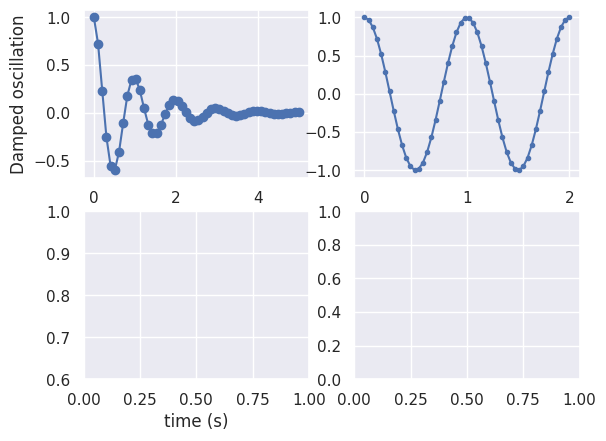

In [70]:
"""fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
#fig.suptitle('A tale of 2 subplots')

ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax3.set_xlabel('time (s)')
#ax2.set_ylabel('Undamped')
ax3.set_ylim(0.6, 1)
plt.show() """

In [15]:
min_4_chunks = {
    'GPT-J(Test)':{'1':74.144,'2':79.088,'3':78.802,'4':78.707},
    'GPT-J(Val.)':{'1':77.649,'2':83.615,'3':81.567,'4':80.854},
    'MESc(Test)':{'1':79.256,'2':79.256,'3':79.256,'4':79.256},
    'MESc(Val.)':{'1':82.442,'2':82.442,'3':82.442,'4':82.442}
    }

min_6_chunks = {
    'GPT-J(Test)':{'1':73.655,'2':78.896,'3':78.345,'4':78.206,'5': 77.931,'6':77.517},
    'GPT-J(Val.)':{'1':77.873,'2':84.054,'3':81.953,'4':81.829,'5': 82.941,'6':81.953},
    'MESc(Test)':{'1':79.721,'2':79.721,'3':79.721,'4':79.721,'5':79.721 ,'6':79.721},
    'MESc(Val.)':{'1':82.806,'2':82.806,'3':82.806,'4':82.806,'5':82.806 ,'6':82.806}
    }

min_8_chunks = {
    'GPT-J(Test)':{'1':71.304,'2':77.173,'3':76.304,'4':75.869,'5':75.869 ,'6':76.521,'7':75.652 ,'8':75},
    'GPT-J(Val.)':{'1':78.613,'2':83.564,'3':81.98,'4':81.584,'5':83.168 ,'6':80.792,'7':81.188 ,'8':82.376},
    'MESc(Test)':{'1':76.939,'2':76.939,'3':76.939,'4':76.939,'5':76.939 ,'6':76.939,'7':76.939 ,'8':76.939},
    'MESc(Val.)':{'1':82.189,'2':82.189,'3':82.189,'4':82.189,'5':82.189 ,'6':82.189,'7':82.189 ,'8':82.189}
    }

min_10_chunks = {
    'GPT-J(Test)':{'1':72.964,'2':78.501,'3':79.153,'4':76.872,'5':76.547 ,'6':78.175,'7':77.85 ,'8':76.547,'9':77.198 ,'10':75.57},
    'GPT-J(Val.)':{'1':79.754,'2':84.969,'3':82.515,'4':81.901,'5':83.435 ,'6':81.901,'7':81.288 ,'8':81.901,'9':78.834 ,'10':78.834},
    'MESc(Test)':{'1':78.688,'2':78.688,'3':78.688,'4':78.688,'5':78.688 ,'6':78.688,'7':78.688 ,'8':78.688,'9':78.688 ,'10':78.688},
    'MESc(Val.)':{'1':82.534,'2':82.534,'3':82.534,'4':82.534,'5':82.534 ,'6':82.534,'7':82.534 ,'8':82.534,'9':82.534 ,'10':82.534}
    }
#pd.DataFrame(min_4_chunks).plot(kind='line')
#plt.show()


In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,8)) #sharey=True,
plt.subplots_adjust(wspace=0.1, hspace=0.15)
ax1.set(ylabel='\u03bc-F1 (%)') #xlabel='4 chunks or more', 
colors_1 = list("rgcb")
colors_2 = list("rgcb")
for key, data_dict in min_4_chunks.items():
    x = data_dict.keys()
    y = data_dict.values()
    #ax1.set_xlabel('4 chunks or more')
    if key in ['MESc(Test)','MESc(Val.)']:
        ax1.plot(x,y,'--D',color=colors_1.pop())
    else:
        ax1.plot(x,y,'-o',color=colors_2.pop())
    ax1.legend(min_4_chunks.keys(), ncol=2, loc='best',prop={'size': 9}, title='$\geq$4 chunks (1052 documents)', title_fontsize = 9.5)
    
#ax2.set(ylabel='\u03bc-F1 (%)') #xlabel='6 chunks or more', 
colors_1 = list("rgcb")
colors_2 = list("rgcb")
for key, data_dict in min_6_chunks.items():
    x = data_dict.keys()
    y = data_dict.values()
    #ax1.set_xlabel('4 chunks or more')
    if key in ['MESc(Test)','MESc(Val.)']:
        ax2.plot(x,y,'--D',color=colors_1.pop())
    else:
        ax2.plot(x,y,'-o',color=colors_2.pop())
    ax2.legend(min_6_chunks.keys(), ncol=2, loc='best',prop={'size': 9}, title='$\geq$6 chunks (725 documents)', title_fontsize = 9.5)
    
ax3.set(ylabel='\u03bc-F1 (%)') #xlabel='8 chunks or more', 
#ax3.set_title(label='8 chunks or more')
colors_1 = list("rgcb")
colors_2 = list("rgcb")
for key, data_dict in min_8_chunks.items():
    x = data_dict.keys()
    y = data_dict.values()
    #ax1.set_xlabel('4 chunks or more')
    if key in ['MESc(Test)','MESc(Val.)']:
        ax3.plot(x,y,'--D',color=colors_1.pop())
    else:
        ax3.plot(x,y,'-o',color=colors_2.pop())
    ax3.legend(min_8_chunks.keys(), ncol=2, loc='best',prop={'size': 9}, title='$\geq$8 chunks (460 documents)', title_fontsize = 9.5)
    
#ax4.set(ylabel='\u03bc-F1 (%)') #xlabel='10 chunks or more', 
colors_1 = list("rgcb") #myk
colors_2 = list("rgcb")
for key, data_dict in min_10_chunks.items():
    x = data_dict.keys()
    y = data_dict.values()
    #ax1.set_xlabel('4 chunks or more')
    if key in ['MESc(Test)','MESc(Val.)']:
        ax4.plot(x,y,'--D',color=colors_1.pop())
    else:
        ax4.plot(x,y,'-o',color=colors_2.pop())
    ax4.legend(min_10_chunks.keys(), ncol=2, loc='best',prop={'size': 9}, title='$\geq$10 chunks (307 documents)', title_fontsize = 9.5)
#plt.savefig(for_ipynb_run+"chunk_number_vs_prediction_score_for_fine_tuned_model_GPT-J 6B_in_SCOTUS.pdf", format="pdf", bbox_inches="tight", dpi=1000, pad_inches=0)

Line2D(_child3)


IndexError: pop from empty list

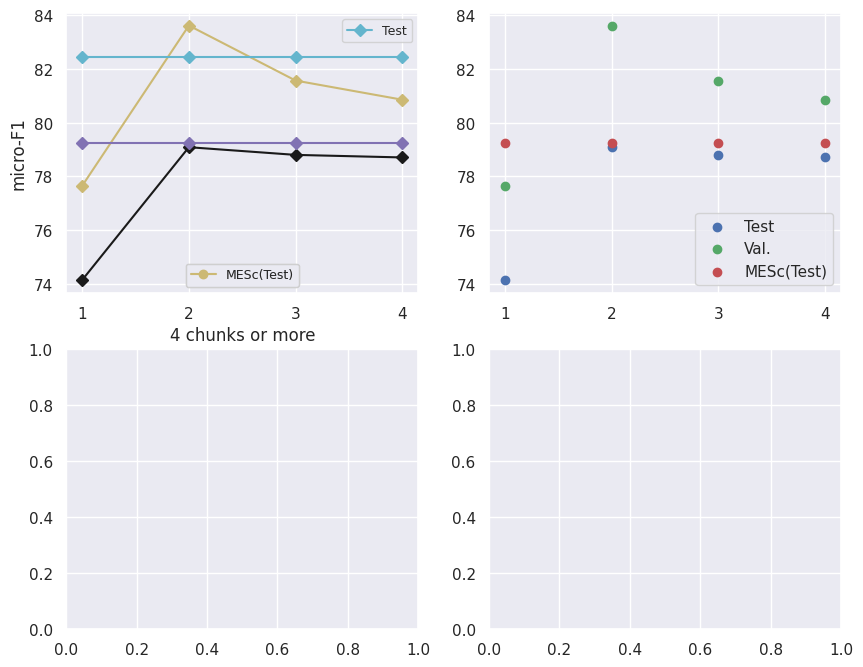

In [76]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8)) #sharey=True,

ax1.set(xlabel='4 chunks or more', ylabel='micro-F1')
colors = list("rgbcmyk")
for data_dict in min_4_chunks.values():
    x = data_dict.keys()
    y = data_dict.values()
    #ax1.set_xlabel('4 chunks or more')
    ax1_plot_1, = ax1.plot(x,y,'-D',color=colors.pop())
    ax1.legend(min_4_chunks.keys(), loc='best',prop={'size': 9})
"""colors = list("rgbcmyk")
for data_dict in MESc_min_4_chunks.values():
    x = data_dict.keys()
    y = data_dict.values()
    #ax1.set_xlabel('4 chunks or more')
    ax1_plot_2, = ax1.plot(x,y,'-o',color=colors.pop())
"""    
#l1, = ax1.plot([0,3], [83.1,83.1],linestyle='dotted', label="MESc(Test)",color=colors.pop())
#l2, = ax1.plot([0,3], [82.1,82.1],linestyle='dotted', label="MESc(Val.)",color=colors.pop())
print(ax1_plot_1)
ax1_legend_0 = ax1.legend([ax1_plot_1],min_4_chunks.keys(), loc='best',prop={'size': 9})
ax1_legend_1 = ax1.legend([ax1_plot_2],MESc_min_4_chunks.keys(), loc='lower center',prop={'size': 9})
#ax1_legend_1 = ax1.legend(handles = [l1,l2], loc='lower center', prop={'size': 9})
ax1.add_artist(ax1_legend_0)
ax1.add_artist(ax1_legend_1)


for data_dict in min_4_chunks.values():
    x = data_dict.keys()
    y = data_dict.values()
    ax2.scatter(x,y,color=colors.pop())

    ax2.legend(min_4_chunks.keys())

plt.show()

In [59]:
df = pd.DataFrame({'length': [1.5, 0.5, 1.2, 0.9, 3],

                  'width': [0.7, 0.2, 0.15, 0.2, 1.1]},

                  index=['pig', 'rabbit', 'duck', 'chicken', 'horse'])

plot = df.plot.scatter(kind='scatter',title="DataFrame Plot")

TypeError: PlotAccessor.scatter() missing 2 required positional arguments: 'x' and 'y'